In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
plt.rc('font', family='NanumGothic')

# 마이너스 기호 설정
plt.rcParams['axes.unicode_minus'] = False

file_path1 = r"./data/jeju_card_region_2017.csv"
jeju_card_2017_df = pd.read_csv(file_path1)

file_path2 = r"./data/jeju_card_region_2018.csv"
jeju_card_2018_df = pd.read_csv(file_path2)

file_path3 = r"./data/jeju_population.csv"
jeju_pop_df = pd.read_csv(file_path3)

In [2]:
# 데이터 전처리
pd.options.display.float_format = '{:.3f}'.format


jeju_card_2017_df = jeju_card_2017_df[jeju_card_2017_df['업종명'] != '기타 갬블링 및 베팅업']
jeju_card_2018_df = jeju_card_2018_df[jeju_card_2018_df['업종명'] != '택시 운송업']


In [3]:
# 데이터 결합
jeju_card_df = pd.concat([jeju_card_2017_df, jeju_card_2018_df], ignore_index=True)

In [4]:
# 연월 컬럼 전처리
jeju_card_df['연월'] = jeju_card_df['연월'].str[:7]

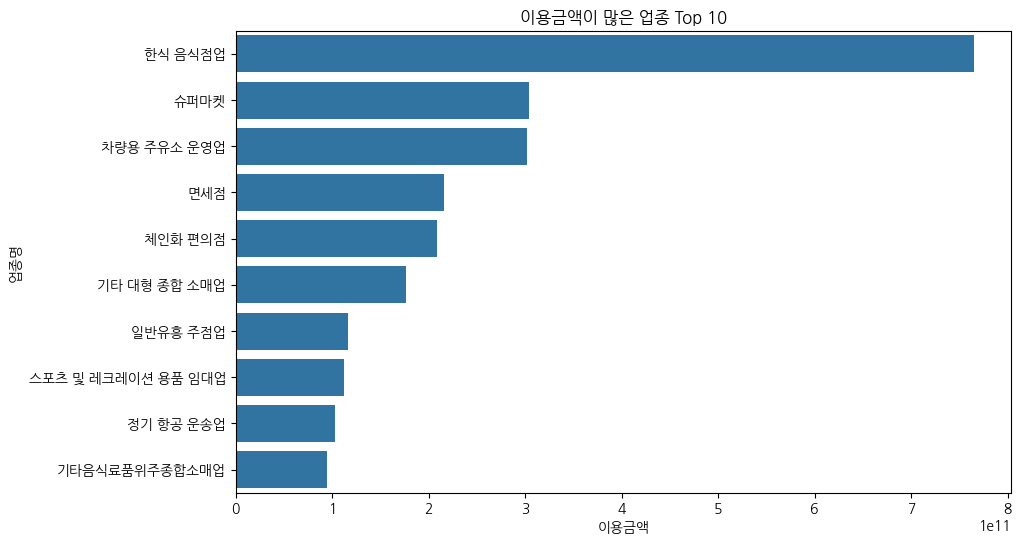

In [5]:
# 이용금액이 많은 업종 Top 10
top10_amount_s = jeju_card_df.groupby('업종명')['이용금액'].sum().nlargest(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_amount_s.values, y=top10_amount_s.index)
plt.title("이용금액이 많은 업종 Top 10")
plt.xlabel('이용금액')
plt.ylabel('업종명')
plt.show()

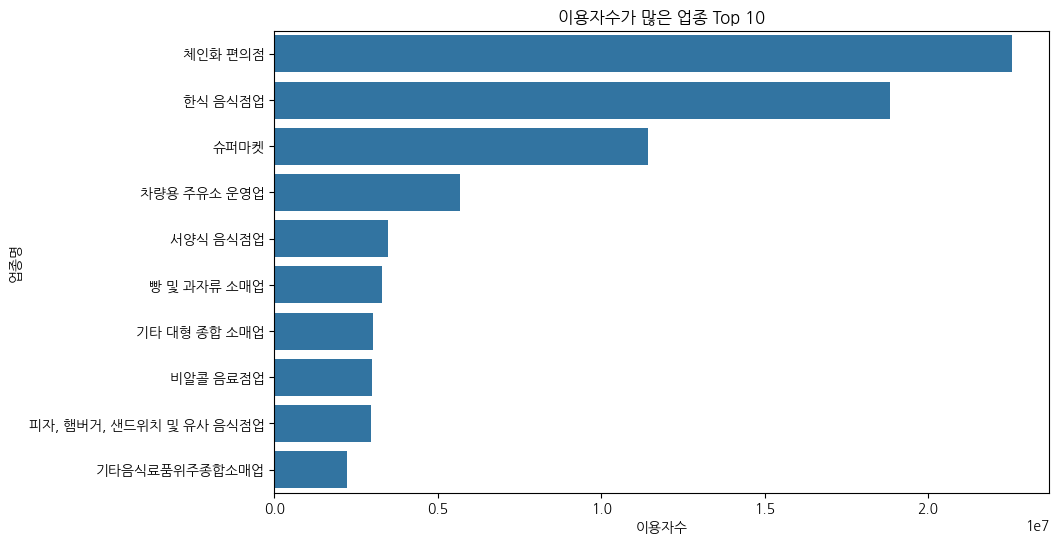

In [6]:
# 이용자수가 많은 업종 Top 10
top10_users_s = jeju_card_df.groupby('업종명')['이용자수'].sum().nlargest(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_users_s.values, y=top10_users_s.index)
plt.title("이용자수가 많은 업종 Top 10")
plt.xlabel('이용자수')
plt.ylabel('업종명')
plt.show()

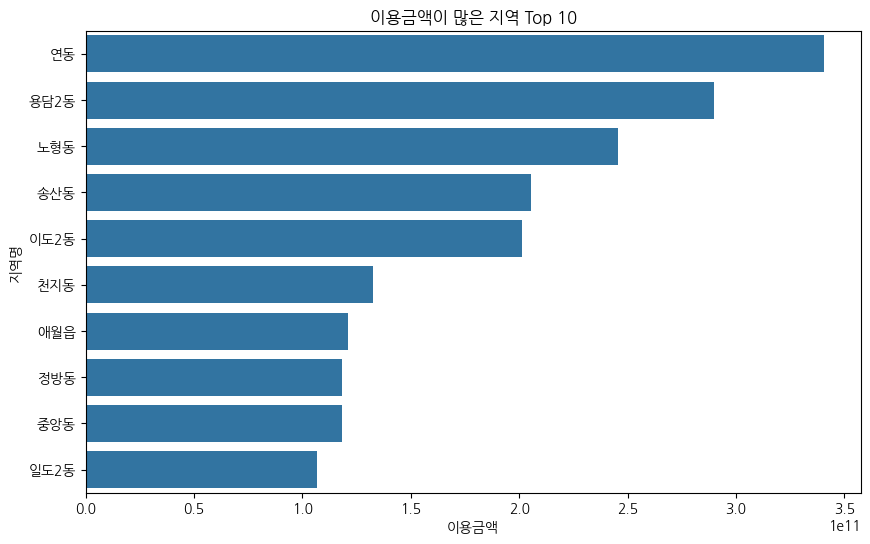

In [7]:
# 이용금액이 많은 지역 Top 10
top10_amount_r = jeju_card_df.groupby('읍면동명')['이용금액'].sum().nlargest(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_amount_r.values, y=top10_amount_r.index)
plt.title("이용금액이 많은 지역 Top 10")
plt.xlabel('이용금액')
plt.ylabel('지역명')
plt.show()

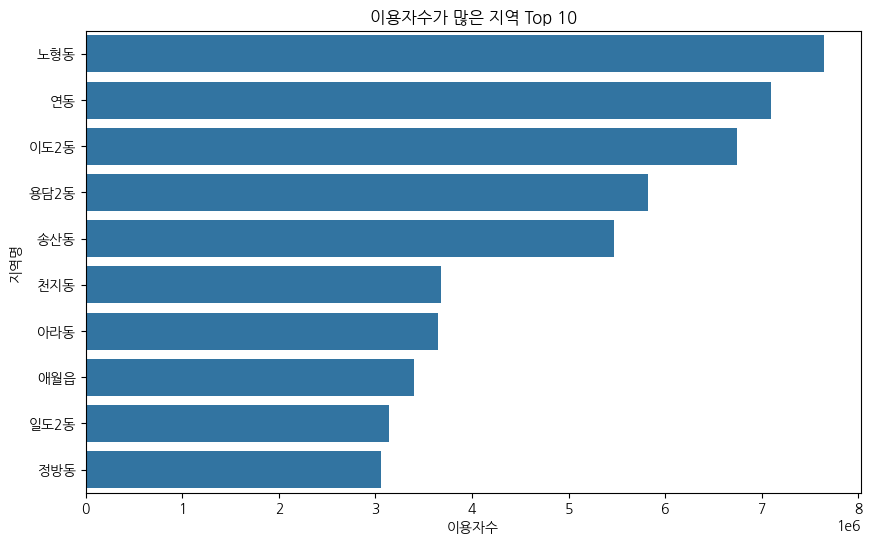

In [8]:
# 이용자수가 많은 지역 Top 10
top10_users_r = jeju_card_df.groupby('읍면동명')['이용자수'].sum().nlargest(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_users_r.values, y=top10_users_r.index)
plt.title("이용자수가 많은 지역 Top 10")
plt.xlabel('이용자수')
plt.ylabel('지역명')
plt.show()

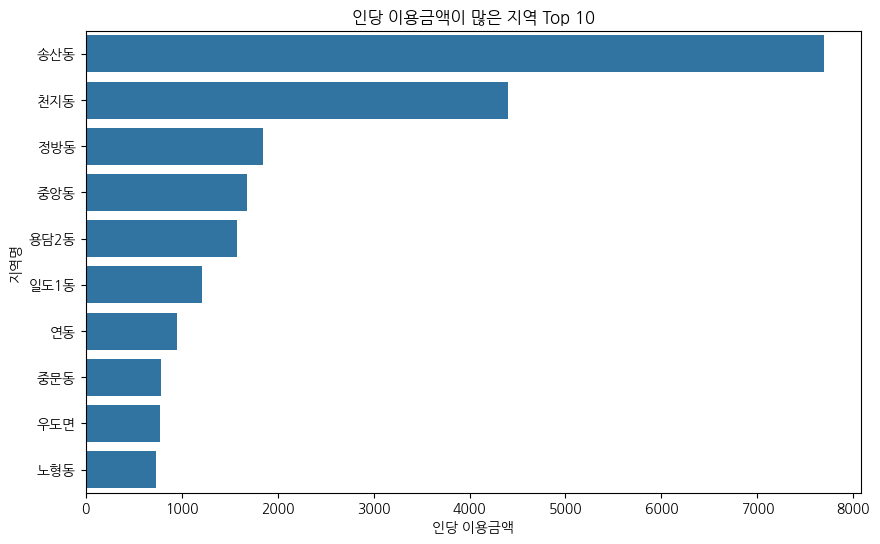

In [9]:
# '방문인구'를 이용해 인당 이용금액 계산
total_amount_r = jeju_card_df.groupby('읍면동명')['이용금액'].sum()
visit_pop_r = jeju_pop_df.groupby('읍면동명')['방문인구'].sum()
capita_r = total_amount_r / visit_pop_r

# 인당 이용금액이 많은 지역 Top 10
top10_capita_r = capita_r.nlargest(10)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=top10_capita_r.values, y=top10_capita_r.index)
plt.title("인당 이용금액이 많은 지역 Top 10")
plt.xlabel('인당 이용금액')
plt.ylabel('지역명')
plt.show()

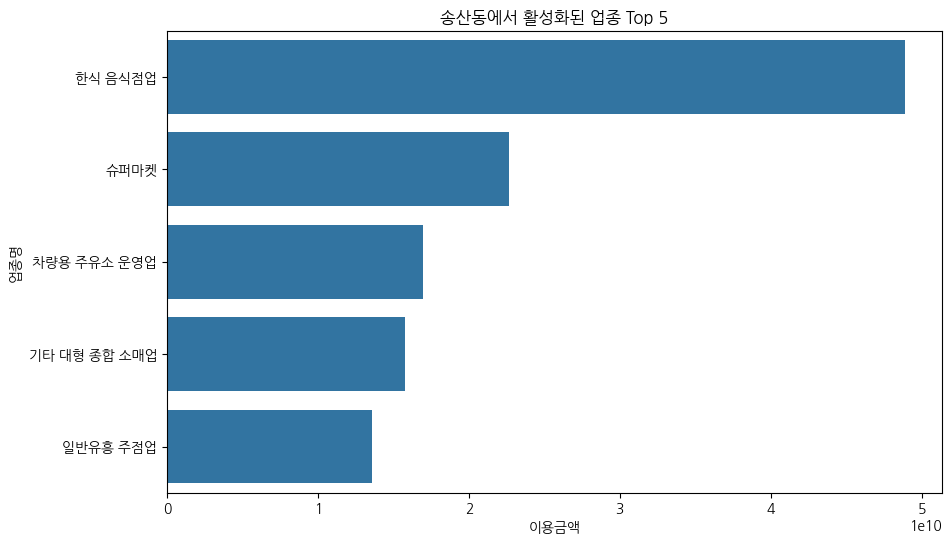

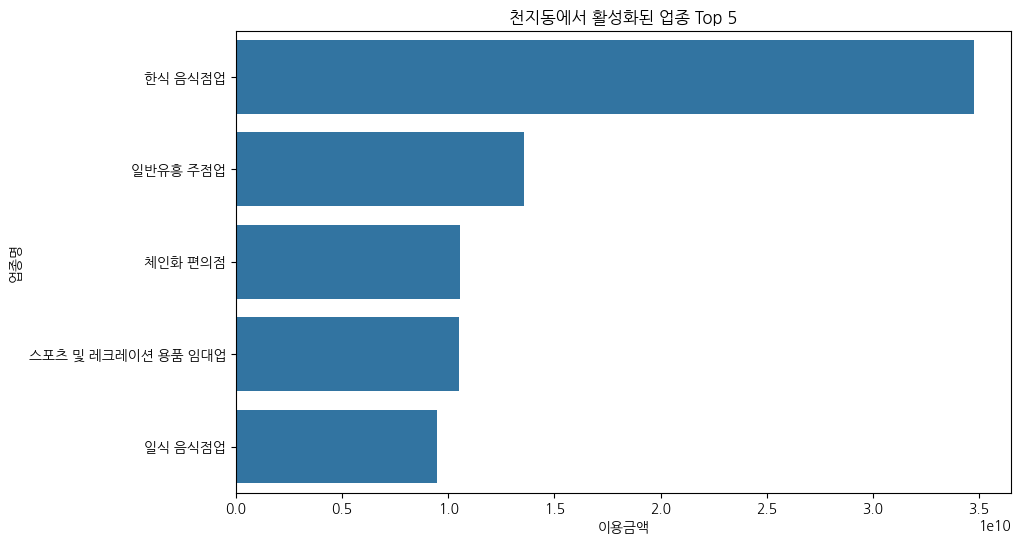

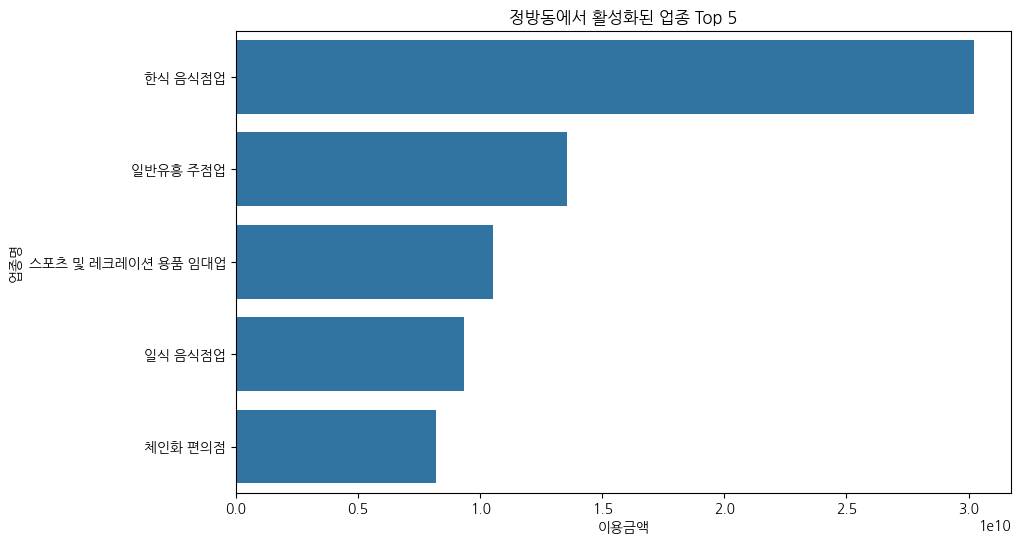

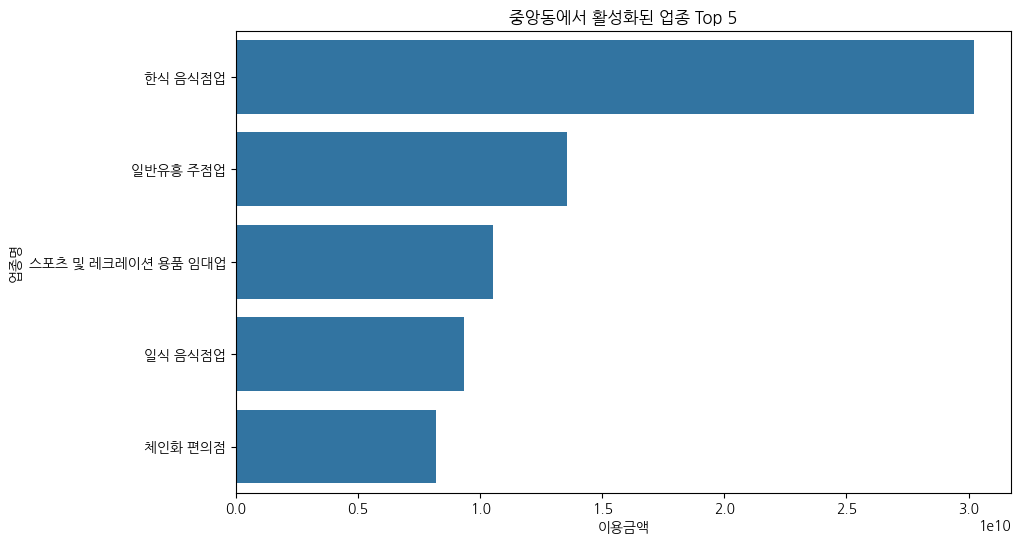

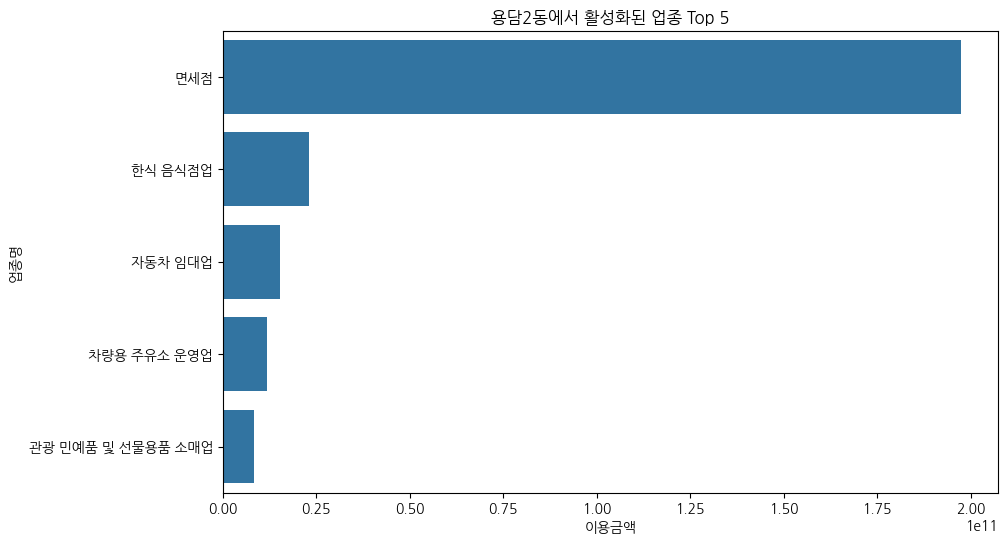

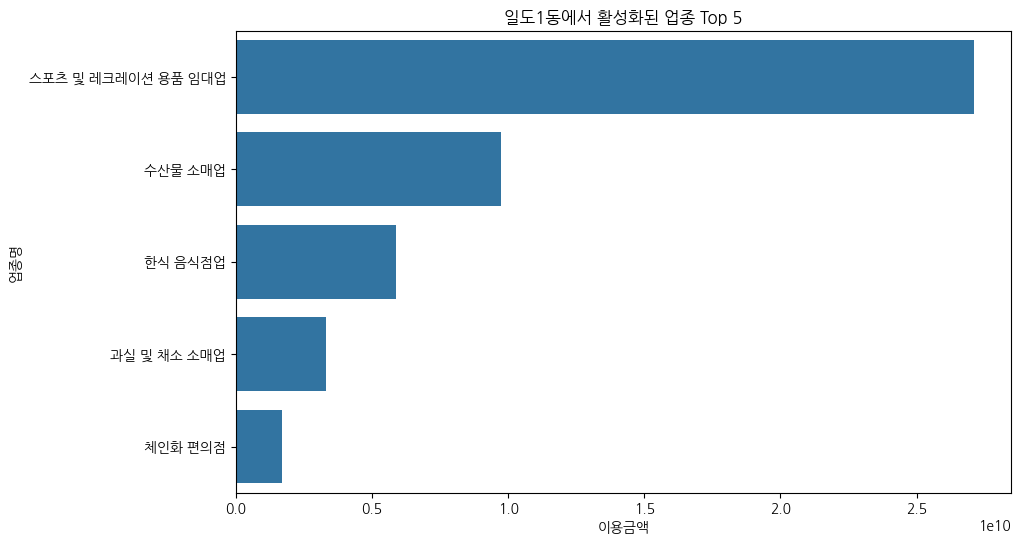

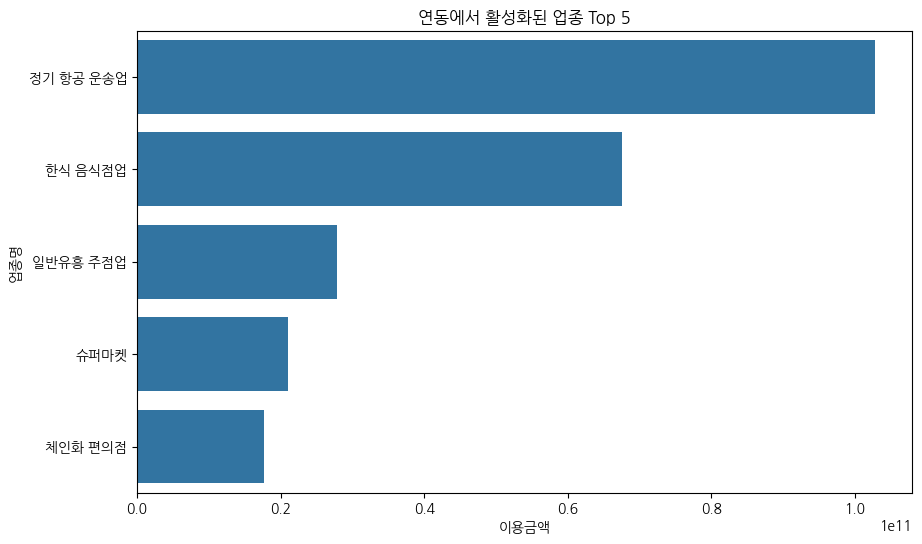

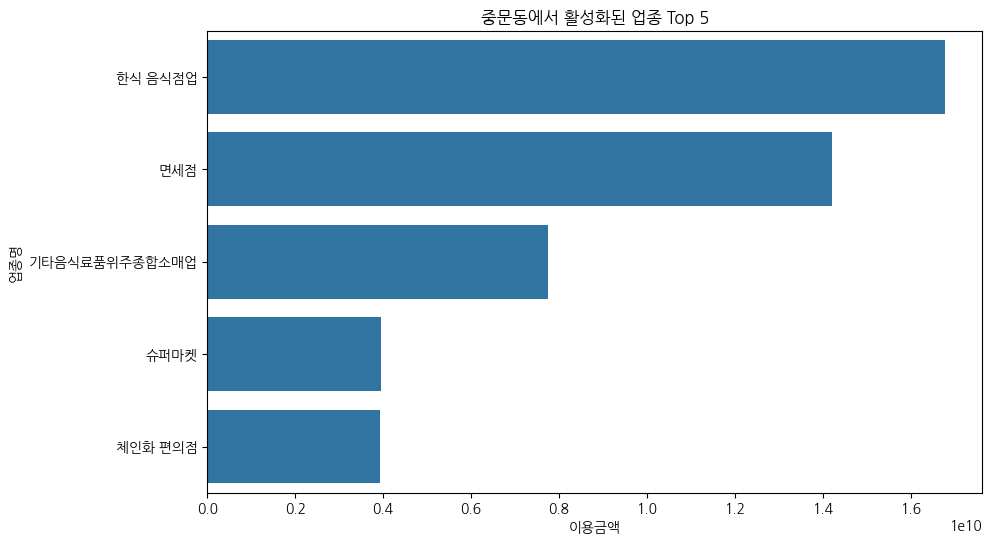

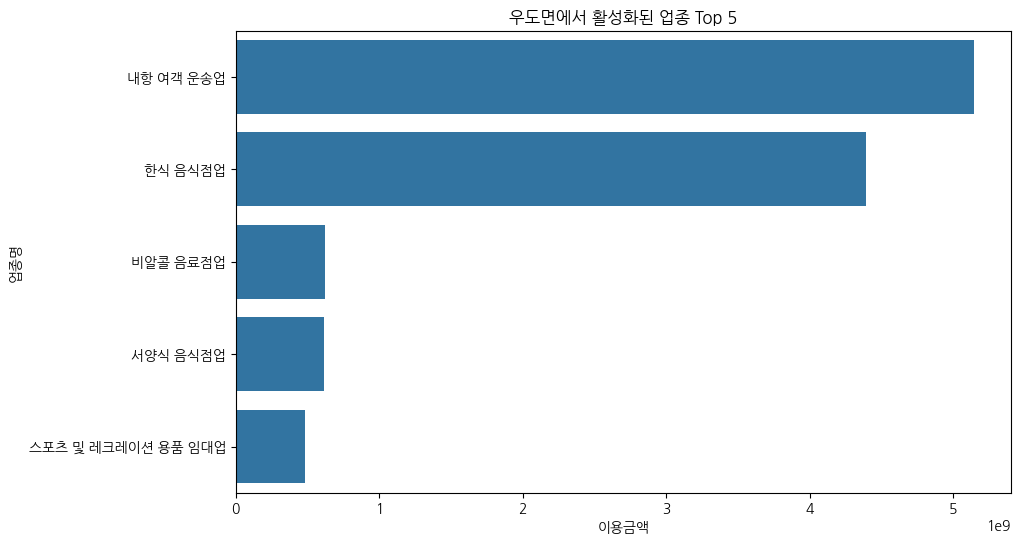

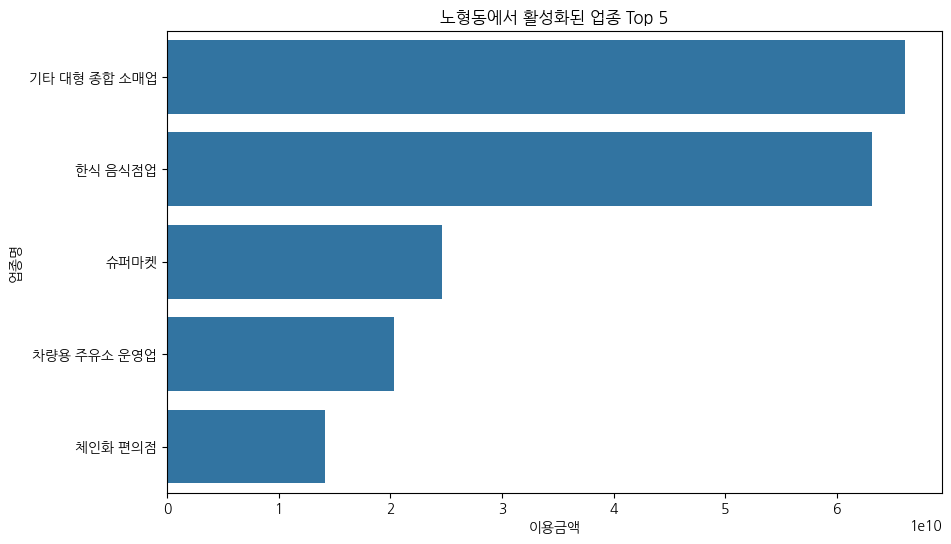

In [10]:
# 각 지역에서 활성화된 업종
top10_regions = top10_capita_r.index

for region in top10_regions:
    top_sector = jeju_card_df[jeju_card_df['읍면동명'] == region].groupby('업종명')['이용금액'].sum().nlargest(5)

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_sector.values, y=top_sector.index)
    plt.title(f"{region}에서 활성화된 업종 Top 5")
    plt.xlabel('이용금액')
    plt.ylabel('업종명')
    plt.show()

In [11]:

# 컬럼 전처리
jeju_pop_df['연월일'] = jeju_pop_df['연월일'].astype('string')
jeju_pop_df['연월'] = jeju_pop_df['연월일'].str[:4] + '-' + jeju_pop_df['연월일'].str[4:6]

jeju_pop_df['성별'] = jeju_pop_df['성별'] + '성'

# 데이터 합치기
groupby_pop = jeju_pop_df.groupby(['연월', '시군구명', '읍면동명', '성별']).sum(numeric_only=True).reset_index()
jeju_df = pd.merge(jeju_card_df, groupby_pop, how='left', on=['연월', '시군구명', '읍면동명', '성별'])

Text(0.5, 1.0, '카페의 방문 인구와 카드 이용 금액')

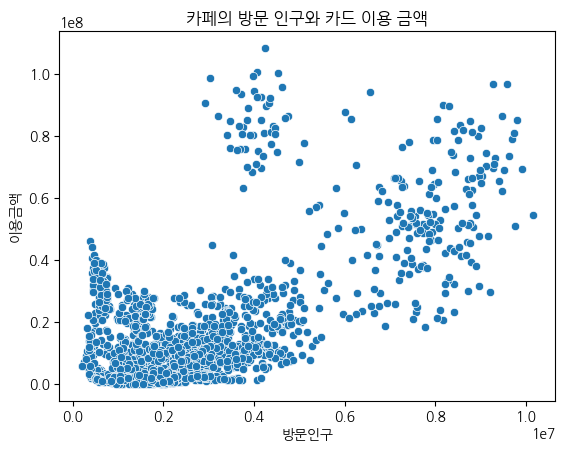

In [13]:
# 카페 업종 필터링
cafe_data = jeju_df[jeju_df['업종명'] == '비알콜 음료점업']
cafe_data.groupby('읍면동명').sum(numeric_only=True).sort_values(by='이용금액', ascending=False).iloc[:10]

# 시각화
sns.scatterplot(cafe_data, x='방문인구', y='이용금액')
plt.title('카페의 방문 인구와 카드 이용 금액')